### 1st Answer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
np.random.seed(96)

In [12]:
s = df.sample(25)

In [13]:
s.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
128,1,117,88,24,145,34.5,0.403,40,1
79,2,112,66,22,0,25.0,0.307,24,0
565,2,95,54,14,88,26.1,0.748,22,0
209,7,184,84,33,0,35.5,0.355,41,1
464,10,115,98,0,0,24.0,1.022,34,0


In [21]:
s.shape

(25, 9)

In [15]:
s_mean = s['Glucose'].mean()

In [16]:
s_max = s['Glucose'].max()

In [17]:
p_mean = df['Glucose'].mean()

In [53]:
p_max = df['Glucose'].max()

In [54]:
print("Sample Mean: ",s_mean)
print("Sample Max: ",s_max)
print("Population Mean: ",p_mean)
print("Population Max: ",p_max)

Sample Mean:  121.6
Sample Max:  188
Population Mean:  120.89453125
Population Max:  199


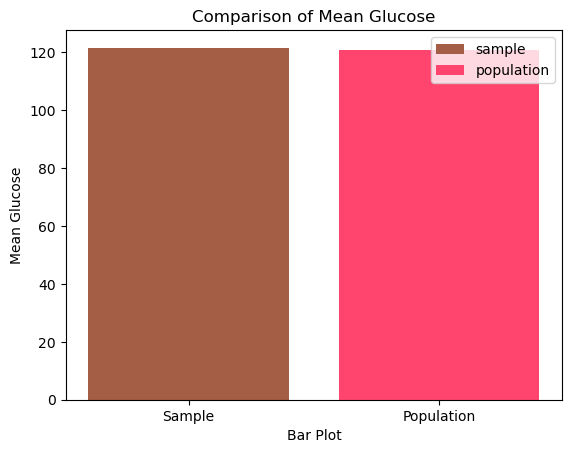

In [56]:
plt.bar(["Sample", "Population"], [s_mean, p_mean],color=['#a45e45', '#ff456e'],label=['sample','population'])
plt.xlabel("Bar Plot")
plt.ylabel("Mean Glucose")
plt.legend()
plt.title("Comparison of Mean Glucose")
plt.show()

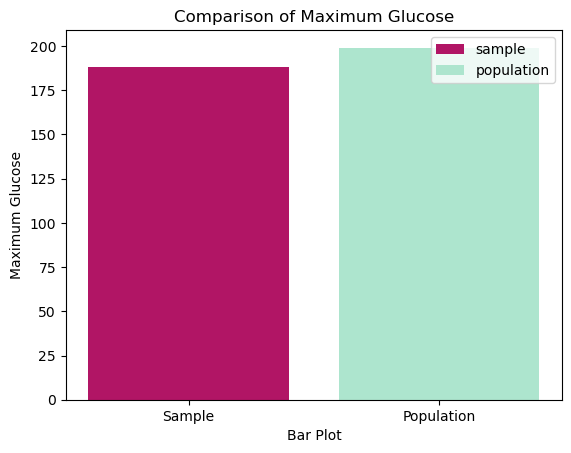

In [62]:
plt.bar(["Sample", "Population"], [s_max, p_max],color=['#b11565', '#ade5ce'],label=['sample','population'])
plt.xlabel("Bar Plot")
plt.ylabel("Maximum Glucose")
plt.legend()
plt.title("Comparison of Maximum Glucose")
plt.show()

#### The sample mean is slightly higher than the population mean, this tells that the sample is not perfectly representative of the population, but it is close and the sample maximum is lower than the population, this suggests that there are a few outliers in the population that are not represented in the sample

### 2nd Answer

In [40]:
s_98percentile = s['BMI'].quantile(0.98)

In [41]:
p_98percentile = df['BMI'].quantile(0.98)

In [42]:
print("98th percentile for Sample: ",s_98percentile)
print("98th percentile for Population: ",p_98percentile)

98th percentile for Sample:  47.324
98th percentile for Population:  47.52599999999996


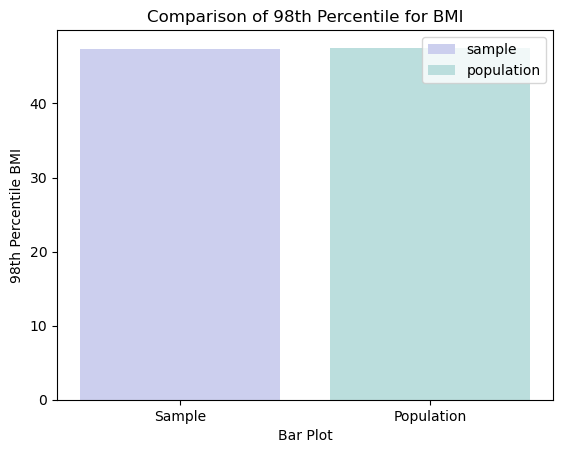

In [67]:
plt.bar(["Sample", "Population"], [s_98percentile, p_98percentile], color=['#cccfee', '#bbdedd'],label=['sample','population'])
plt.xlabel("Bar Plot")
plt.ylabel("98th Percentile BMI")
plt.legend()
plt.title("Comparison of 98th Percentile for BMI")
plt.show()

#### This tells  that the sample is representative of the population but may not capture a few extreme values present in the population.

### 3rd Answer

In [112]:
bootstrap_samples = []
for i in range(500):
    sample = df.sample(150, replace=True)
    bootstrap_samples.append(sample)

bs_means = []
bs_stds = []
bs_95thpercentiles = []
for sample in bootstrap_samples:
    bs_means.append(sample["BloodPressure"].mean())
    bs_stds.append(sample["BloodPressure"].std())
    bs_95thpercentiles.append(sample["BloodPressure"].quantile(0.95))


p_mean = df["BloodPressure"].mean()
p_std = df["BloodPressure"].std()
p_95thpercentile = df["BloodPressure"].quantile(0.95)

print("Population -------->")
print("Population mean:", p_mean)
print("Population standard deviation:", p_std)
print("Population 95th percentile:", p_95thpercentile)

print("Bootstrap  -------->")
print("Bootstrap mean:", np.mean(bs_means))
print("Bootstrap standard deviation:", np.mean(bs_stds))
print("Bootstrap 95th percentile:", np.mean(bs_95thpercentiles))


Population -------->
Population mean: 69.10546875
Population standard deviation: 19.355807170644777
Population 95th percentile: 90.0
Bootstrap  -------->
Bootstrap mean: 69.16986666666666
Bootstrap standard deviation: 19.12214150284489
Bootstrap 95th percentile: 91.13829999999999


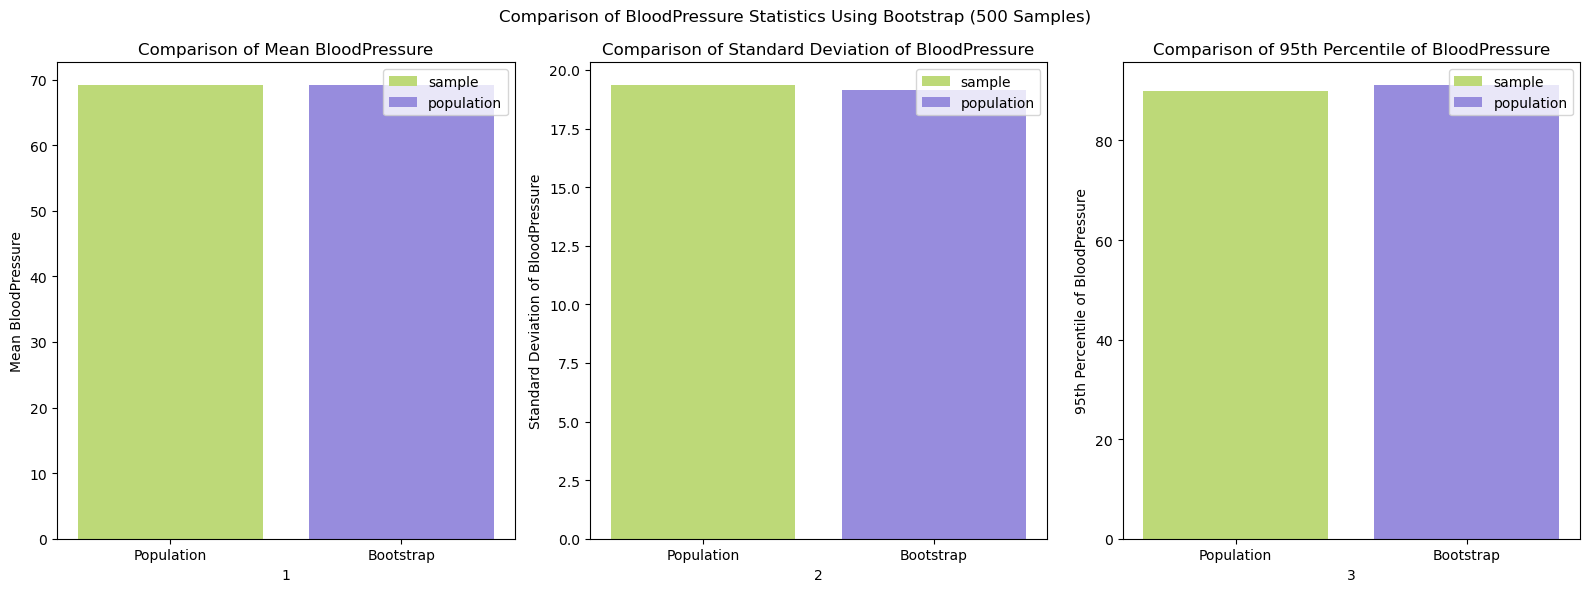

In [113]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.bar(["Population", "Bootstrap"], [p_mean, np.mean(bs_means)],color=['#bdd978', '#978cdd'],label=['sample','population'])
plt.xlabel("1")
plt.ylabel("Mean BloodPressure")
plt.legend()
plt.title("Comparison of Mean BloodPressure")

plt.subplot(1, 3, 2)
plt.bar(["Population", "Bootstrap"], [p_std, np.mean(bs_stds)],color=['#bdd978', '#978cdd'],label=['sample','population'])
plt.xlabel("2")
plt.ylabel("Standard Deviation of BloodPressure")
plt.legend()
plt.title("Comparison of Standard Deviation of BloodPressure")

plt.subplot(1, 3, 3)
plt.bar(["Population", "Bootstrap"], [p_95thpercentile, np.mean(bs_95thpercentiles)],color=['#bdd978', '#978cdd'],label=['sample','population'])
plt.xlabel("3")
plt.ylabel("95th Percentile of BloodPressure")
plt.legend()
plt.title("Comparison of 95th Percentile of BloodPressure")

plt.suptitle("Comparison of BloodPressure Statistics Using Bootstrap (500 Samples)")
plt.tight_layout()
plt.show()

#### Since the bootstrap statistics and the population statistics are so similar, it appears that the bootstrap method works well for estimating population statistics.